In [2]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('fivethirtyeight')
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
plt.style.available

['seaborn-bright',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-talk',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-pastel',
 'classic',
 'seaborn-darkgrid',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-whitegrid',
 'ggplot',
 'bmh',
 'grayscale',
 'seaborn-white',
 'fivethirtyeight']

In [5]:
reload(CCCma)
reload(cs)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'CCCma_stations' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_stations.py'>

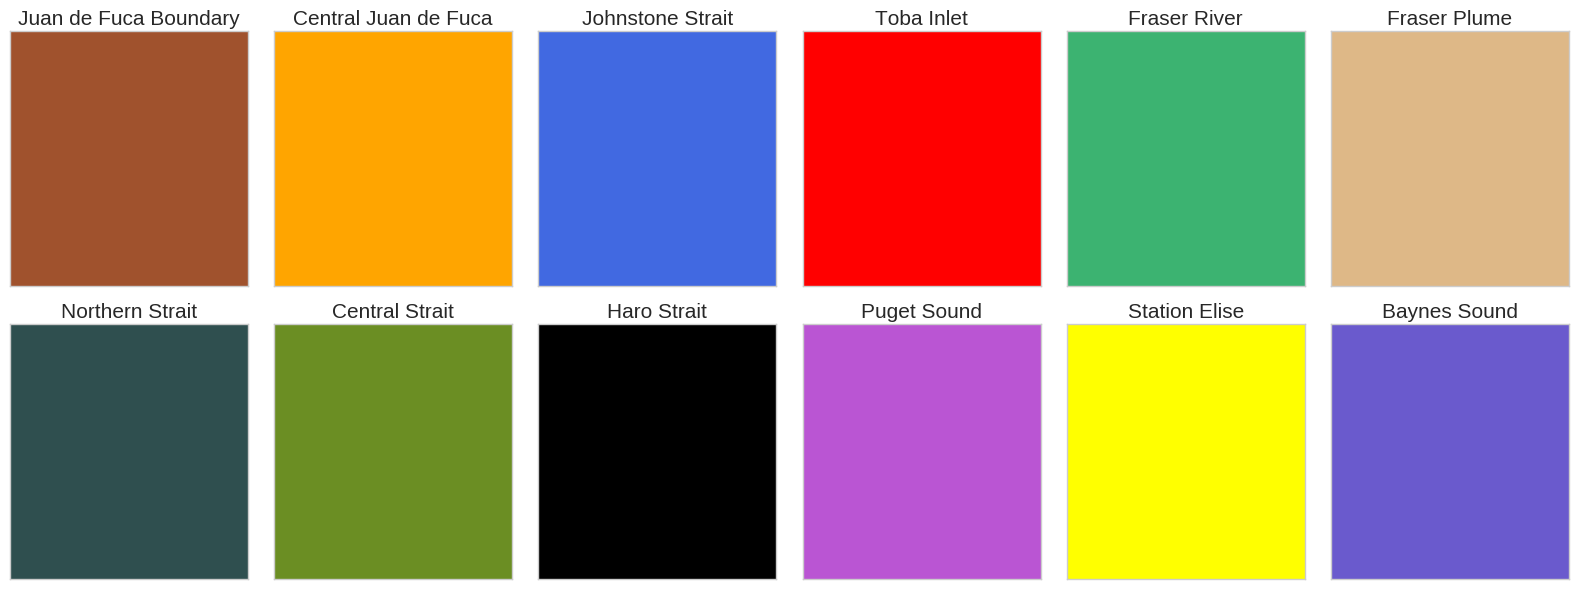

In [6]:
stn_names = []
stn_cols = []

for key in cs.STATIONS:
    sn = cs.STATIONS[key]['fullname']
    col = cs.STATIONS[key]['color']
    
    stn_names.append(sn)
    stn_cols.append(col)
    
f, axs = plt.subplots(2,6, figsize = (16, 6), sharey = True)
fs = 15
i = 0

for ax in axs.reshape(-1):
    
    fn = stn_names[i]
    col = stn_cols[i]
    pat = patches.Rectangle((0,0),1,1,linewidth=2,edgecolor=col,facecolor=col)
    ax.add_patch(pat)
    ax.set_title(fn,fontsize = fs )
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    i = i+1

plt.tight_layout()


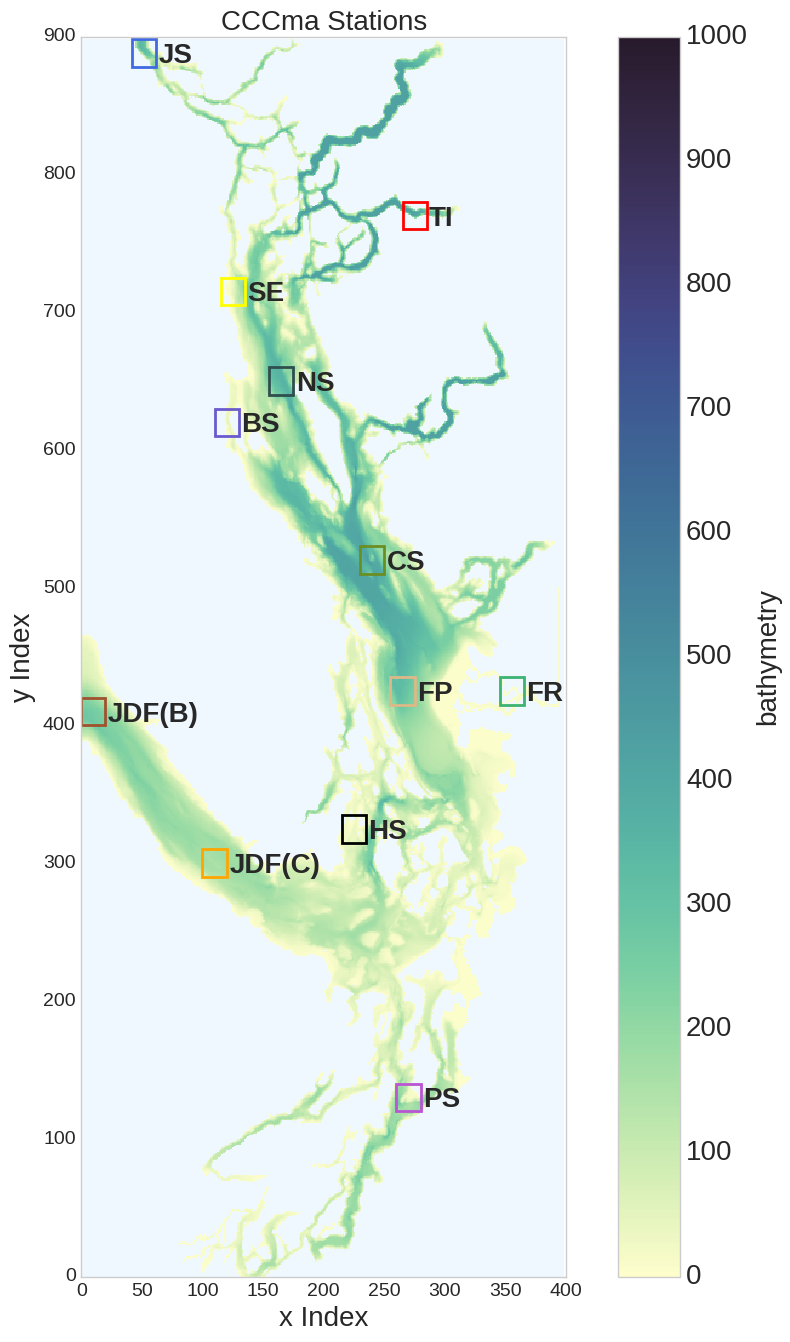

In [7]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

CCCma.one_panel_plot(bath1, cs.STATIONS, 'CCCma Stations', \
               cm.cm.deep,12,16,0,1000,'bathymetry','')

In [8]:
date = '2014-11-13'
def CCCma_pipe(run_date):
    
    #run_date = arrow.get(date)
    ddmmmyy = run_date.format('DDMMMYY').lower()
    humandate = run_date.format('MMM DD, YYYY')
    yyyymmdd = run_date.format('YYYYMMDD')
    
    print('ANALYZING ANALYZING ',humandate)
    carp = f'/results/SalishSea/hindcast/{ddmmmyy}/SalishSea_1d_{yyyymmdd}_{yyyymmdd}_carp_T.nc'
    grid = f'/results/SalishSea/hindcast/{ddmmmyy}/SalishSea_1d_{yyyymmdd}_{yyyymmdd}_grid_T.nc'
    
    carp = nc.Dataset(carp)
    grid = nc.Dataset(grid)
    
    rdir = '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/FLUX_MOCSY_DEV/CCCma/'
    
    dss = CCCma.days_since_start(ddmmmyy)
    print(dss)
    dss_sig = str(dss)
    pars_profs, stn_list, depths = CCCma.profiles(carp,grid,cs.STATIONS)
    pars_pts, pt_depths, stn_list2 = CCCma.point_value(carp,grid,cs.STATIONS)
    CCCma.profile_plotter(pars_profs,depths,cs.STATIONS, humandate, ddmmmyy, rdir, dss_sig)
    CCCma.ncmaker(stn_list, depths, pt_depths, pars_profs, pars_pts, ddmmmyy, rdir)
    CCCma.surface_maps(carp,grid,cs.STATIONS,ddmmmyy,rdir,humandate, dss_sig)
    CCCma.parameterspace(pars_profs,cs.STATIONS,rdir,ddmmmyy,humandate, dss_sig)

In [9]:
import datetime
start = '2016-02-29'
end = '2016-12-31'
def range_analyzer(start,end):
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    for i in range(0,len(arrow_array)):
        r = arrow_array[i][0]
        print(r)
        CCCma_pipe(r)


In [10]:
def parameterspace4(pars_profs,stns,rdir,ddmmmyy,humandate, dss_sig):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 12) , nrows=2, ncols=2)

    cols = []
    xs = []
    ys = []
    stn_in = []
    for s in stns:
        col = stns[s]['color']
        x = stns[s]['x']
        y = stns[s]['y']
        stn = stns[s]['code']
        cols.append(col)
        xs.append(x)
        ys.append(y)
        stn_in.append(stn)
    nos = len(cols)
    
    for i in range(0,nos):
        sal_prof = pars_profs['sal']
        DIC_prof = pars_profs['DIC']
        ax1.plot(sal_prof[i,:],DIC_prof[i,:],c=cols[i],marker='o',
                           markersize=15, linestyle = '')
        ax1.legend(stn_in, fontsize = 20)
        ax1.set_title("DIC vs Salinity",fontsize=20)
    #TA
    for i in range(0,nos):
        TA_prof = pars_profs['TA']
        ax2.plot(sal_prof[i,:],TA_prof[i,:],c=cols[i],marker='o',
                           markersize=15, linestyle = '')
        ax2.set_title("TA vs Salinity",fontsize=20)
    #OmegaA
    for i in range(0,nos):
        OmA_prof = pars_profs['OmA']
        ax3.plot(sal_prof[i,:],OmA_prof[i,:],c=cols[i],marker='o',
                           markersize=15, linestyle = '')
        ax3.set_title("OmegaA vs Salinity",fontsize=20)
        
    #OmegaA
    for i in range(0,nos):
        OmA_prof = pars_profs['OmA']
        ax4.plot(sal_prof[i,:],pH_prof[i,:],c=cols[i],marker='o',
                           markersize=15, linestyle = '')
        ax4.set_title("pH vs Salinity",fontsize=20)

    ax1.set_xlabel('Salinity (g/kg)', fontsize = 20)
    ax2.set_xlabel('Salinity (g/kg)', fontsize = 20)
    ax3.set_xlabel('Salinity (g/kg)', fontsize = 20)
    ax4.set_xlabel('Salinity (g/kg)', fontsize = 20)
    
    ax1.tick_params(axis='y', labelsize=20 )
    ax2.tick_params(axis='y', labelsize=20 )
    ax3.tick_params(axis='y', labelsize=20 )
    ax4.tick_params(axis='y', labelsize=20 )

    ax1.tick_params(axis='x', labelsize=20 )
    ax2.tick_params(axis='x', labelsize=20 )
    ax3.tick_params(axis='x', labelsize=20 )
    ax4.tick_params(axis='x', labelsize=20 )
    
    ax1.set_xlim(15,35)
    ax2.set_xlim(15,35)
    ax3.set_xlim(15,35)
    ax4.set_xlim(15,35)
    
    ax1.set_ylim(1800,2300)
    ax2.set_ylim(1800,2300)
    ax3.set_ylim(0,2)
    ax4.set_ylim(6.8,8.2)
    
    st = 'Salish Sea Carbonate Chemistry Parameterspace Diagram, ' + humandate
    plt.suptitle(st,fontsize=20)
    fname = rdir + f'{ddmmmyy}_4pspace_' + dss_sig +'.png'

    fig.savefig(fname)
    plt.close()

## map movie

In [11]:
#movie_map_.mp4
#movie_prof_.mp4
#movie_pspace_.mp4

from IPython.display import HTML
HTML("""
<video width="960" height="720" controls>
  <source src="./cc_abrupt/movie_map_.mp4" type="video/mp4">
</video>
""")

In [12]:
from IPython.display import HTML
HTML("""
<video width="960" height="720" controls>
  <source src="./cc_abrupt/output.mp4" type="video/mp4">
</video>
""")

In [13]:
from IPython.display import HTML
HTML("""
<video width="960" height="720" controls>
  <source src="./cc_abrupt/movie_pspace_.mp4" type="video/mp4">
</video>
""")